# Análise Financeira de Startups 

## Introdução

O lucro obtido por uma empresa, por um determinado período, depende de vários fatores como custos e investimentos em setores administrativos, marketing , pesquisa e desenvolvimento, etc. A tarefa de prever o lucro é importante para a determinação de metas. Essas metas se tornam diretrizes estratégicas para o crescimento contínuo da empresa. Para empresas de rápido crescimento, como startups, conhecer essas previsões torna-se, mais do que importante, essencial para a sobrevivência da empresa.

Esse Jupyter Notebook contém as seguintes análises de 50 startups dos Estados Unidos:

- Análise exploratória de dados (EDA)
- Custos mais correlatos com lucro das empresa (correlação de variáveis)
- Distribuição de lucros e custo por estados
- Modelagem e predição de lucro com base em custos das startups
- Reinvestimento em setores chaves
- Segmentação segundo perfis das empresas
- Estudo de caso com reiventimento de custo


O banco de dados foi obtido em: https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv

Palavras-chave: *data prediction*, *data modeling*, *Linear Regression*, *Baeysian Regression*, *Clustering*, *K-means*, *Cross-validation*, *Market segmentation*.

## Importação de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import  mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.cluster import KMeans


warnings.filterwarnings('ignore')

## Análise Inicial do Banco de Dados

In [4]:
dados = pd.read_csv("./archive/50_Startups.csv")
dados.shape

(50, 5)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


O bando de dados não possui nenhum dado nulo.

In [6]:
print('As dimensões do banco de dados são:',dados.shape)

As dimensões do banco de dados são: (50, 5)


In [7]:
print('As colunas presentes no DtaFrame são:\n',dados.columns)

As colunas presentes no DtaFrame são:
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [8]:
print(f"Quantidade de dados duplicados: {dados.duplicated().sum()}")

Quantidade de dados duplicados: 0


## Análise Exploratória

Quais estados estão presentes no dataset?

In [9]:
print(f"Estados listadas no dataset:{dados['State'].unique()}\n")
print(f"Quantidade de empresas por estados listadas no dataset: \n{dados['State'].value_counts()}")

Estados listadas no dataset:['New York' 'California' 'Florida']

Quantidade de empresas por estados listadas no dataset: 
New York      17
California    17
Florida       16
Name: State, dtype: int64


Estatísticas básicas do dataset:

In [10]:
dados.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


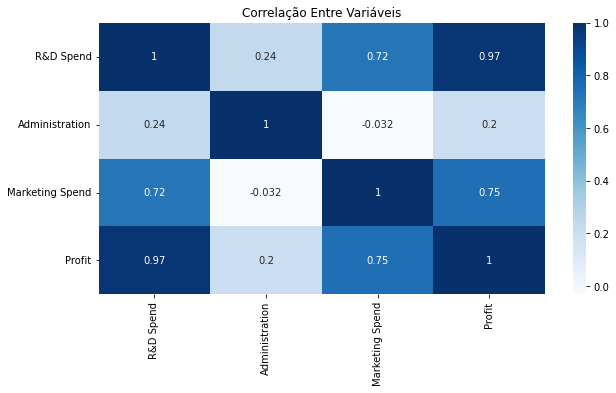

In [11]:
ax = sns.heatmap(dados.corr(),annot=True,cmap='Blues')
ax.figure.set_size_inches(10,5)
ax.set(title="Correlação Entre Variáveis")
plt.show()

Todas as variáveis possuem uma correlação direta com o lucro.

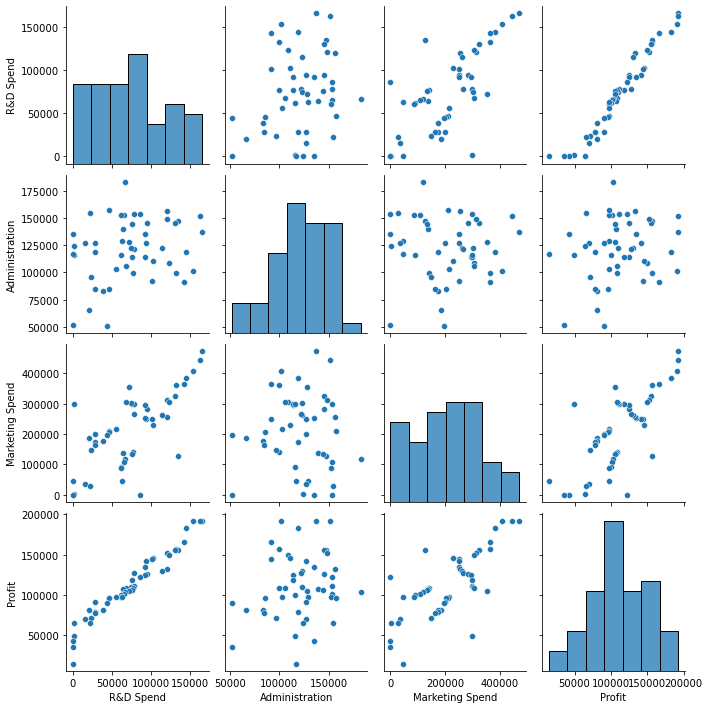

In [12]:
sns.pairplot(dados)

As variáveis de maior influência com o lucro das startups são: 

- R&D Spend (gastos com pesquisa e desenvolvimento)
- Marketing Spend (despesas com marketing)

O maior retorno monetário para as startups são de investimentos em R&D. Os gastos com administração possuem pequena relação com lucro da startup.

Pelo gráfico de correlação, é possível perceber que a relação entre lucro e custos de R&D, nas startups, é linear e é bem comportada. Essa relação pode ser vista melhor no gráfico exibido abaixo. Diferentemente dos custos com marketing, que também possui uma alta correlação com o lucro, mas não apresenta um gráfico bem comportado. 

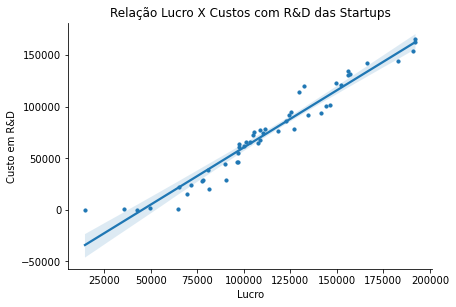

In [13]:
ax = sns.lmplot(x="Profit", y="R&D Spend",data=dados,height=5,scatter_kws={"s": 10, "alpha": 1})
ax.figure.set_size_inches(7,4)
ax.set(title='Relação Lucro X Custos com R&D das Startups',xlabel='Lucro',ylabel='Custo em R&D')

## Analisando Lucro por Estado

[Text(0.5, 1.0, 'Distribuição de Lucros por estado'),
 Text(0, 0.5, 'Lucro'),
 Text(0.5, 0, 'Estado')]

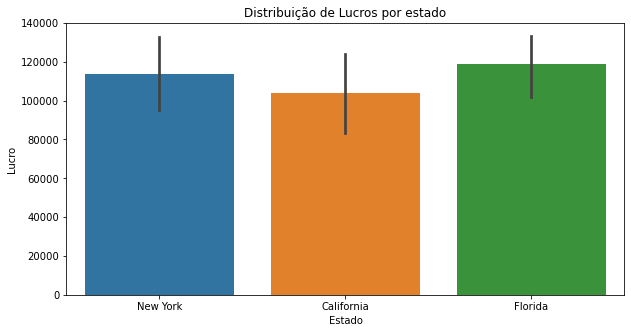

In [14]:
ax = sns.barplot(data=dados,x='State',y='Profit')
ax.figure.set_size_inches(10,5)
ax.set(title="Distribuição de Lucros por estado",ylabel="Lucro",xlabel='Estado')

Em média, as startups dos três estados possuem um lucro aproximado.

In [15]:
ny = dados.query("State == 'New York'")['Profit'].describe()
ca = dados.query("State == 'California'")['Profit'].describe()
fl = dados.query("State == 'Florida'")['Profit'].describe()

lucro_estado = pd.DataFrame(data = {"New York":ny,"California":ca,"Florida":fl})
lucro_estado

,New York,California,Florida
count,17.000000,17.000000,16.000000
mean,113756.446471,103905.175294,118774.024375
std,41140.258117,44446.359357,35605.470428
min,35673.410000,14681.400000,49490.750000
25%,96479.510000,78239.910000,99147.922500
50%,108552.040000,97427.840000,109543.120000
75%,129917.040000,134307.350000,142719.627500
max,192261.830000,191792.060000,191050.390000


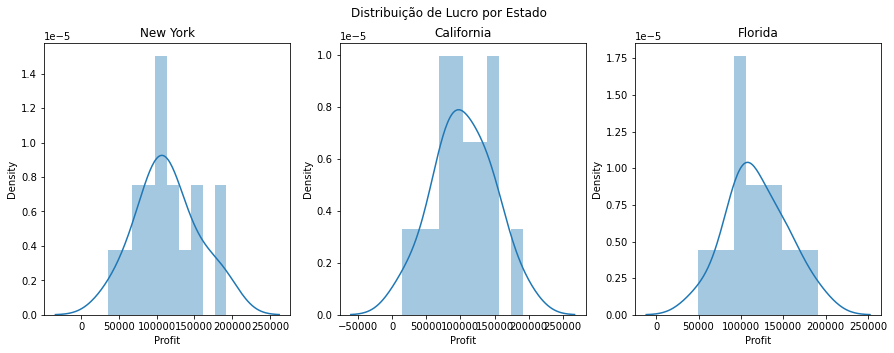

In [16]:
fig,axs = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Distribuição de Lucro por Estado')
for i in range(0,3):
    sns.distplot(dados.query(f"State == '{list(dados['State'].unique())[i]}'")["Profit"],bins=10,ax=axs[i])
    axs[i].set(title= list(dados['State'].unique())[i])

## Detectando Outliers

[Text(0.5, 1.0, 'Distribuição de Lucros'), Text(0, 0.5, 'Lucro')]

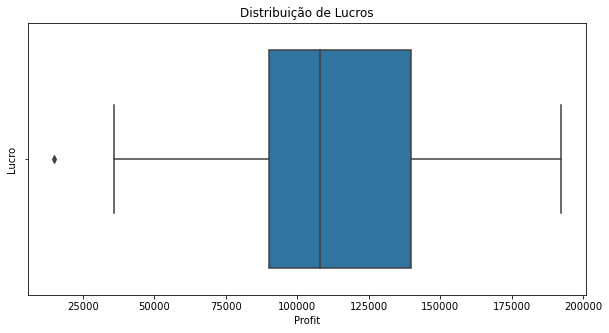

In [17]:
ax = sns.boxplot(data=dados, x="Profit")
ax.figure.set_size_inches(10,5)
ax.set(title="Distribuição de Lucros",ylabel="Lucro")

O banco de dados possui poucos candidatos a outliers na variável "Profit".

Medidas separatrizes da variável Lucro:

In [18]:
dados['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

Medidas separatrizes por estado:

[Text(0.5, 1.0, 'Distribuição de Lucros por Estado'), Text(0, 0.5, 'Lucro')]

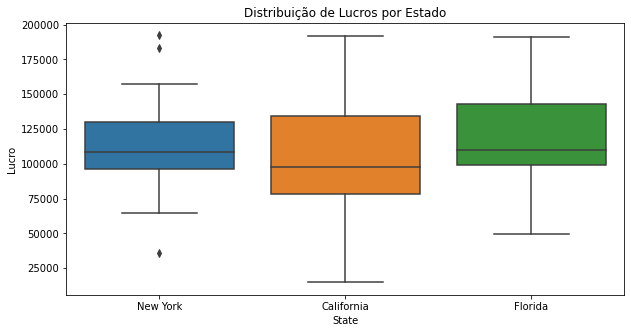

In [19]:
ax = sns.boxplot(data=dados, x="State", y="Profit")
ax.figure.set_size_inches(10,5)
ax.set(title="Distribuição de Lucros por Estado",ylabel="Lucro")

New York é o estado com maior número de candidatos a outliers, a maior parte das empresas desse estado possui lucro numa faixa bem estabelecida, com pequeno desvio padrão, quando comparado aos outros estados. A Califórnia possui a maior heterogeniedade entre as empresas, quando comparado o lucro.

Por conta da pequena quantidade de dados, e pelo fato de haverem poucos outliers, eles nãos serão retirados do dataset.

## Analisando Gastos por Estado

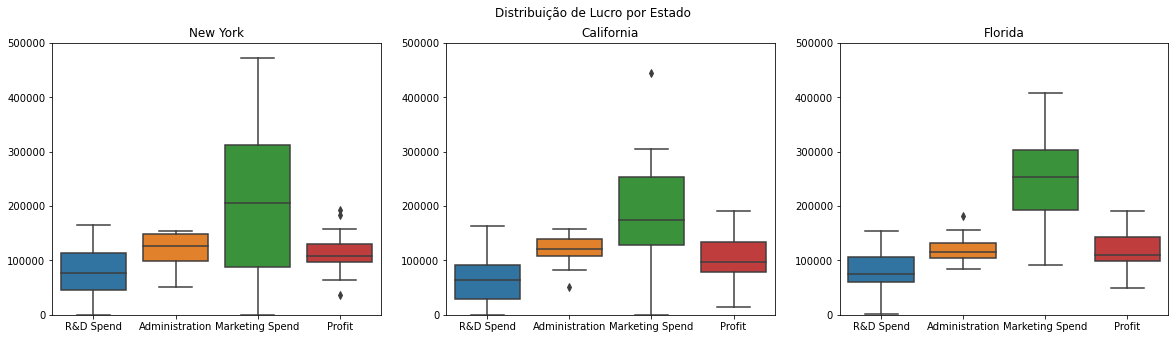

In [66]:
fig,axs = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Distribuição de Lucro por Estado')
for i in range(0,3):
    sns.boxplot(data=dados.query(f"State == '{list(dados['State'].unique())[i]}'").iloc[:,:-1],ax=axs[i])
    axs[i].set(title= list(dados['State'].unique())[i],ylim=(0,500000))

O maior valor de custo nas startups, em média, é em Marketing, seguido de custos em sua admnistração e, por fim, em pesquisa de desenvolvimento (R&D).

[Text(0.5, 1.0, 'Distribuição de Gastos com R&D por Estado')]

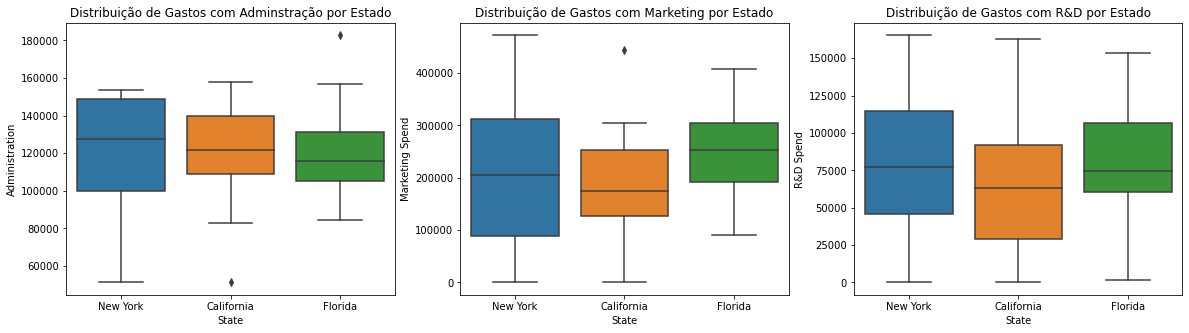

In [74]:
fig, axs = plt.subplots(1,3,figsize=(20,5))

sns.boxplot(data=dados, x="State", y="Administration",ax=axs[0])
axs[0].set(title="Distribuição de Gastos com Adminstração por Estado")

sns.boxplot(data=dados, x="State", y="Marketing Spend",ax=axs[1])
axs[1].set(title="Distribuição de Gastos com Marketing por Estado")

sns.boxplot(data=dados, x="State", y="R&D Spend",ax=axs[2])
axs[2].set(title="Distribuição de Gastos com R&D por Estado")


## Modelando o Lucro das Startups

A seguir, é construido um modelo, para prever o lucro das startups com base nos seus gastos.

In [24]:
dados.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [25]:
#Divisão dos conjuntos de teste e treinamento
X = dados.iloc[:,:-1].values
labelenc = LabelEncoder() 
X[:,3] = labelenc.fit_transform(X[:,3])
y = dados.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [26]:
X[0:5]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

In [27]:
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treinamento: 37 amostras
Tamanho do conjunto de teste: 13 amostras


In [28]:
# Normalização das variáveis
sc_x = StandardScaler()
X_train,X_test = sc_x.fit_transform(X_train), sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train, y_test = sc_y.fit_transform(y_train.reshape(-1, 1)) ,sc_y.fit_transform(y_test.reshape(-1, 1))

A seguir, são avaliados dois tipos de regressão linear, para modelagem dos dados. Como o banco de dados é composto por uma pequena quantidade de amostras, os dois modelos serão avaliados por meio da validação cruzada, segundo sua medida de acurácia.

### Regressão Linear por Mínimos Quadrados

In [29]:
lin_reg = LinearRegression()
k=5
lin_reg_scores = cross_val_score(lin_reg, X, y, cv=k)
print('Acurácia média do modelo por correlação cruzada:',(lin_reg_scores.sum()/k)*100)

lin_reg = lin_reg.fit(X_train, y_train)
print('Acurácia do conjunto de treinamento:',lin_reg.score(X_train, y_train))
print('Acurácia do conjunto de teste:',lin_reg.score(X_test, y_test))

Acurácia média do modelo por correlação cruzada: 100.0
Acurácia do conjunto de treinamento: 1.0
Acurácia do conjunto de teste: 1.0


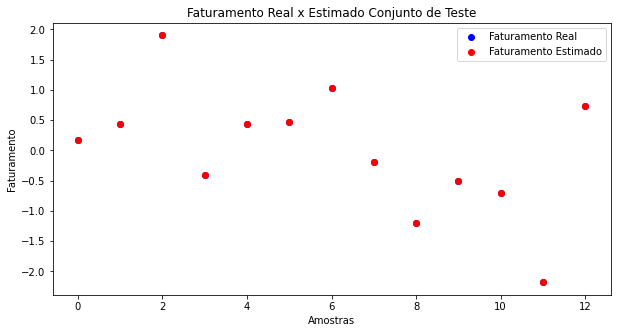

In [30]:
y_estimado = lin_reg.predict(X_test)
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(y_test,'o',color='blue',label='Faturamento Real')
ax.plot(y_estimado,'o',color='red',label='Faturamento Estimado')
ax.set_title('Faturamento Real x Estimado Conjunto de Teste')
ax.set_xlabel('Amostras')
ax.set_ylabel('Faturamento')
ax.legend()
plt.show()

O encaixe do modelos nos dados foi praticamente perfeita, mesmo com o uso da validação cruzada. É muito porvável que tenha ocorrido o overfit dos dados durante o processo de modelagem. Mas isso é compreensivel, uma vez que os dados são bem comportados, e possuirem uma pequena quantidade de amostras. 

### Regressão Linear Bayesiana

In [31]:
bay_reg = BayesianRidge()
bay_reg_scores = cross_val_score(bay_reg, X, y, cv=k)
print('Acurácia média do modelo:',(bay_reg_scores.sum()/k)*100)

bay_reg.fit(X_train, y_train)
print('Acurácia do conjunto de treinamento:',bay_reg.score(X_train, y_train))
print('Acurácia do conjunto de teste:',bay_reg.score(X_test, y_test))

Acurácia média do modelo: 100.0
Acurácia do conjunto de treinamento: 0.9999999999999999
Acurácia do conjunto de teste: 0.9999999999999999


O modelo de regressão baysiano também se aproximou muito de uma acurácia do último modelo de regressão. O modelo selecionado para a previsão do lucro é a regressão linear por mínimos quadrados.

In [32]:
lucro = lin_reg.predict(X_test)
print('O erro na predição do valor do lucro é de:',mean_absolute_error(y_test,lucro))

O erro na predição do valor do lucro é de: 4.568994755188144e-16


## Segmentando Startups por Perfil de Custo

Por meio das informações presentes no baco de dados é possível segmentar as startups em grupos segundo seu perfil de custo. Existem startups que destinam boa parte do seu orçamento para o marketing, outras destinam a maior parte em R&D. A segmentação do banco de dados vai permitir uma análise mais aprofundado com base no perfil de cada uma delas. Essa segmentação por ser feita com métodos de clusterização, e é o que será feito a serguir com um método conhecido como K-means. 

O K-means é um método de clusterização, que procura agrupamentos no espaço de característica da variável. Esse é um método não supervisionado, ou seja, não depende que os dados possuam rótulos. Ele agrupa as amostras de acordo com a sua disposição no espaço. Neste método, é definido a priori a quantidade de grupos que serão formados no espaço. Para definir a quantidade de agrupamentos, será usado o *Elbow Method*.

Como o perfil de custo das startups não depende da sua localização (existem empresas de todos os portes em todos os lugares), a informação sobre a localização de cada uma das empresas não será considerada para definir os agrupamentos pelo K-means, apenas as seguintes variáveis: 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit'.


In [33]:
dados.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [34]:
#normalização dos dados
sc = StandardScaler()
valores = dados.loc[:,['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].values
dados_cluster = sc.fit_transform(valores) 

In [35]:
# aplicação do k-means para diferentes k
clusters=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dados_cluster)
    clusters.append(kmeans.inertia_)

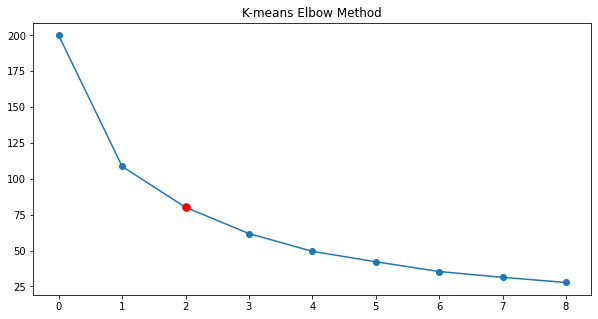

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('K-means Elbow Method')
plt.plot(clusters,marker='o')
plt.plot(2,clusters[2],'r.',markersize=15)
plt.show()

O joelho da curva se encontra em 3 clusters. Com esse dados em mãos, então as startups podem ser segmentadas de acordo com os clusters encontrados pelo método k-means.

In [37]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(dados_cluster)

In [38]:
# Salvando o resultado da segmentação no DataFrame
dados["Segmentation"] = pd.Categorical(kmeans.labels_ )
dados.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Segmentation
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,2
2,153441.51,101145.55,407934.54,Florida,191050.39,2
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,2


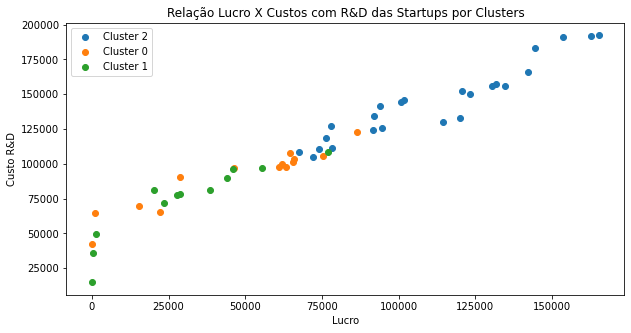

In [39]:
# Vizualização dos cluster de acordo com o lucro
fig = plt.subplots(figsize=(10,5))
plt.title('Relação Lucro X Custos com R&D das Startups por Clusters')
for i in dados['Segmentation'].unique():
    plt.plot(dados.query(f"Segmentation == {i}")['R&D Spend'], dados.query(f"Segmentation == {i}")['Profit'],'o',label='Cluster '+str(i))
plt.legend()
plt.xlabel('Lucro')
plt.ylabel('Custo R&D')
plt.show()

### Definindo Perfis de Startups

É possível definir os perfis de startups presentes em cada cluster, observado os valores médios das variáveis no dataset. Abaixo segue medidas estatísticas para a variável lucro em cada cluster.

In [40]:
s0 = dados.query("Segmentation == 0")['Profit'].describe()
s1 = dados.query("Segmentation == 1")['Profit'].describe()
s2 = dados.query("Segmentation == 2")['Profit'].describe()

lucro_estado = pd.DataFrame(data = {"Cluster 0":s0,"Cluster 1":s1,"Cluster 2":s2})
lucro_estado

,Cluster 0,Cluster 1,Cluster 2
count,14.000000,12.000000,24.000000
mean,90351.204286,73448.101667,143930.745000
std,21626.325437,27298.191120,26752.928075
min,42559.730000,14681.400000,105008.310000
25%,74996.282500,65996.555000,125094.502500
50%,97455.700000,79622.835000,142922.460000
75%,102712.945000,91581.732500,156339.662500
max,122776.860000,108552.040000,192261.830000


[Text(0.5, 1.0, 'Distribuição de Lucros por Cluster'),
 Text(0, 0.5, 'Lucro'),
 Text(0.5, 0, 'Cluster')]

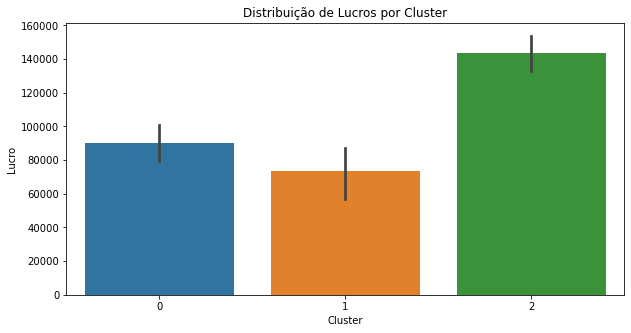

In [96]:
ax = sns.barplot(data=dados,x='Segmentation',y='Profit')
ax.figure.set_size_inches(10,5)
ax.set(title="Distribuição de Lucros por Cluster",ylabel="Lucro",xlabel='Cluster')

O cluster 2 possui a maior média de lucro das startups. Os clusters 0 e 1 obtiveram lucros relativamente próximos. Levando em consideração as outras variáveis do dataset, é possível ter um entendimento melhor dos agrupamentos das empresas, como mostrado nos boxplots abaixo.

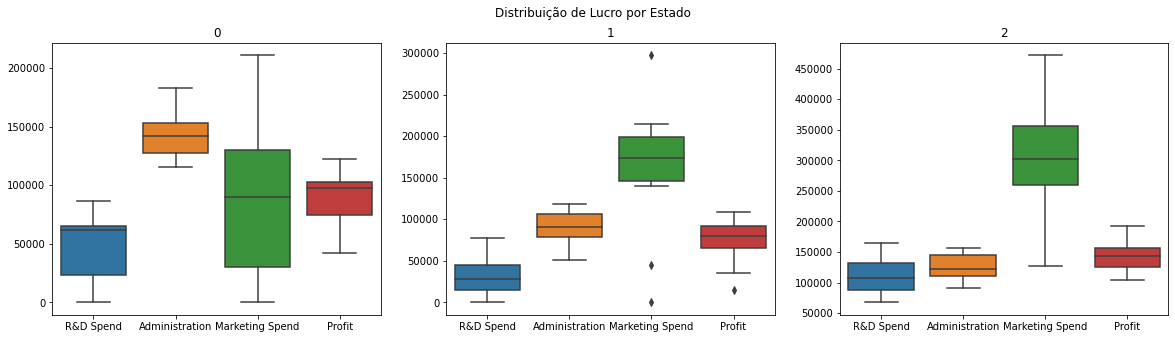

In [76]:
fig,axs = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Distribuição de Lucro por Estado')
for i in range(0,3):
    sns.boxplot(data=dados.query(f"Segmentation =={i}").iloc[:,:-1],ax=axs[i])
    axs[i].set(title=str(i))

Observando o gráfico, é possível retirar as seguintes conclusões:

- É nítido que o cluster 0 é composto por empresas que possuem a menor faixa de lucro de todas as startups. Também são essas empresas que possuem os maiores custos com admninstração, e menores custos com R&D e Marketing.  
- O cluster 1 é composto por empresas que possuem um alto custo com Marketing, quando comparados aos seus outros custos. Por esse motivo, esse cluster possui o segundo maior lucro.
- Já o cluster 2, é composto por empresa que possuem os maiores custos com R&D de todas as startups, juntamente com os custos com Markting. Esse combo de investimento faz com que sejam as startups mais lucrativas.


A distribuição dos três grupos de startups pelos estados do banco de dados pode ser vista no gráfico abaixo.

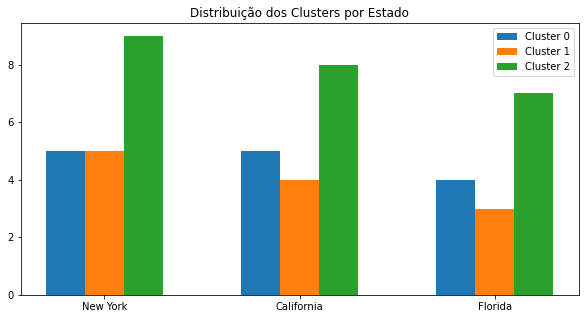

In [43]:
fig = plt.subplots(figsize=(10,5))
plt.bar(np.arange(0,3),dados.query('Segmentation == 0')['State'].value_counts().values, width=0.2,label='Cluster 0')
plt.bar(np.arange(0,3)+0.2,dados.query('Segmentation == 1')['State'].value_counts().values, width=0.2,label='Cluster 1')
plt.bar(np.arange(0,3)+0.2*2,dados.query('Segmentation == 2')['State'].value_counts().values, width=0.2,label='Cluster 2')
plt.xticks(np.arange(0,3)+0.2,['New York','California','Florida'])
plt.legend()
plt.title('Distribuição dos Clusters por Estado')
plt.show()

O que aconteceria se as as empresas do cluster 0 reduzissem em 10% o custo com administração e investissem esse dinheiro nos seus setores de R&D? Vamos descobrir isso no estudo de caso apresentado a seguir. 

## Estudo de Caso

Vamos fazer a seguinte simulação:

1) Pegar todas as empresas do cluster 0, que são as empresas com maiores custos com adminstração, e menores custos com R&D;
2) Reduzir em 10% seus custos com administração;
3) Investir esse dinheiro em pesquisa e desenvolvimento;
4) Observar o impacto dessa redistribuição de custos no lucro médio das esmpresas desse grupo.

In [44]:
# Pegando dados das startups do cluster 0
startups_c0 = dados.query('Segmentation == 0')
startups_c0.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Segmentation
19,86419.70,153514.11,0.00,New York,122776.86,0
25,64664.71,139553.16,137962.62,California,107404.34,0
26,75328.87,144135.98,134050.07,Florida,105733.54,0
28,66051.52,182645.56,118148.20,Florida,103282.38,0
29,65605.48,153032.06,107138.38,New York,101004.64,0


In [45]:
# Criando um novo DataFram com os ajustes de custo: redução de 10% com gastos com AMD e aumento desse valor em R&D
startups_c0_new = startups_c0.copy()
startups_c0_new['R&D Spend'] = startups_c0['R&D Spend'] + startups_c0['Administration']*0.1
startups_c0_new['Administration'] = startups_c0['Administration']*0.9

Com as modificações feitas, pode-se fazer a projeção de lucro, com base no modelo desenvolvido na seção [Modelando o Lucro das Startups](#Modelando-o-Lucro-das-Startups):

In [46]:
X = startups_c0_new.iloc[:,:-2].values
X[:,3] = labelenc.fit_transform(X[:,3])
x = sc_x.fit_transform(X)
startups_c0['Profit'] = sc_y.inverse_transform(lin_reg.predict(x))

Qual foi a porcentagem de aumento do lucro com o reinvestimeto do custo?

In [47]:
print('A porcentagem do aumento do lucro foi de:',round((1-startups_c0_new['Profit'].mean()/startups_c0['Profit'].mean())*100,2),'%')

A porcentagem do aumento do lucro foi de: 25.74 %


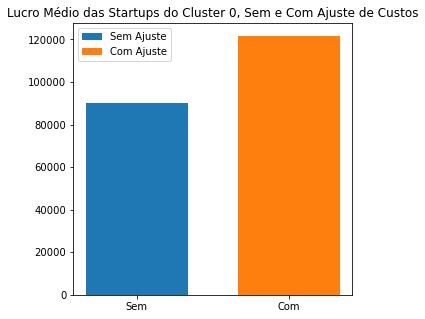

In [48]:
fig = plt.subplots(figsize=(5,5))
plt.bar(0,startups_c0_new['Profit'].mean(), width=0.2,label='Sem Ajuste')
plt.bar(0.3,startups_c0['Profit'].mean(), width=0.2,label='Com Ajuste')
plt.xticks([0,0.3],['Sem','Com'])
plt.legend()
plt.title('Lucro Médio das Startups do Cluster 0, Sem e Com Ajuste de Custos')
plt.show()

## Conclusão

- Os gastos com administração possuem pequena relação com lucro da startup.

- As variáveis de maior influência com o lucro das startups são: R&D Spend e Marketing Spend 

- O maior retorno monetário para as startups são de investimentos em R&D. 

- Em média, as startups dos três estados possuem um lucro aproximado.

- O maior valor de custo nas startups, em média, é em Marketing, seguido de custos em sua admnistração e, por fim, em pesquisa de desenvolvimento (R&D).
- As startups podem segmentadas em três grupos, com os seguintes perfis: 
    - O cluster 0 é composto por empresas que possuem a menor faixa de lucro e maiores custos com admninstração. Também possuem menores custos com R&D e Marketing.  
    - O cluster 1 é composto por empresas que possuem um alto custo com Marketing e possui o segundo maior lucro dos três grupos.
    - O cluster 2, é composto por empresa que possuem os maiores custos com R&D. São as startups mais lucrativas.

- Existem startups dos três perfis em todos os estados.
- Estudo de Caso: Se as empresas do cluster 0 reduzissem em 10% o custo com administração, e investissem esse dinheiro nos seus setores de R&D, aumentariam em 25% seu lucro.